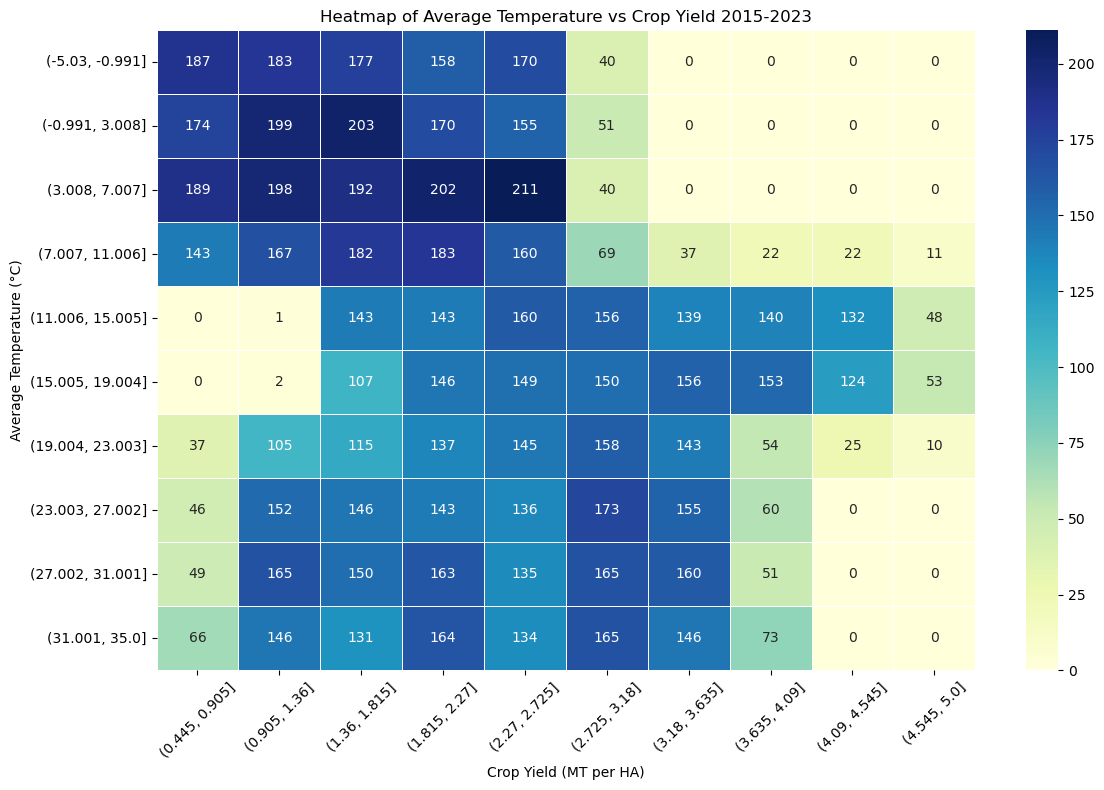

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("climate_change_impact_on_agriculture_2024.csv")

df_recent = df[(df['Year'] >= 2015) & (df['Year'] <= 2023)]

temp_bins = pd.cut(df['Average_Temperature_C'], bins=10)
yield_bins = pd.cut(df['Crop_Yield_MT_per_HA'], bins=10)

heatmap_data = pd.crosstab(temp_bins, yield_bins)

plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap="YlGnBu", annot=True, fmt="d", linewidths=.5)
plt.title("Heatmap of Average Temperature vs Crop Yield 2015-2023")
plt.xlabel("Crop Yield (MT per HA)")
plt.ylabel("Average Temperature (°C)")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()



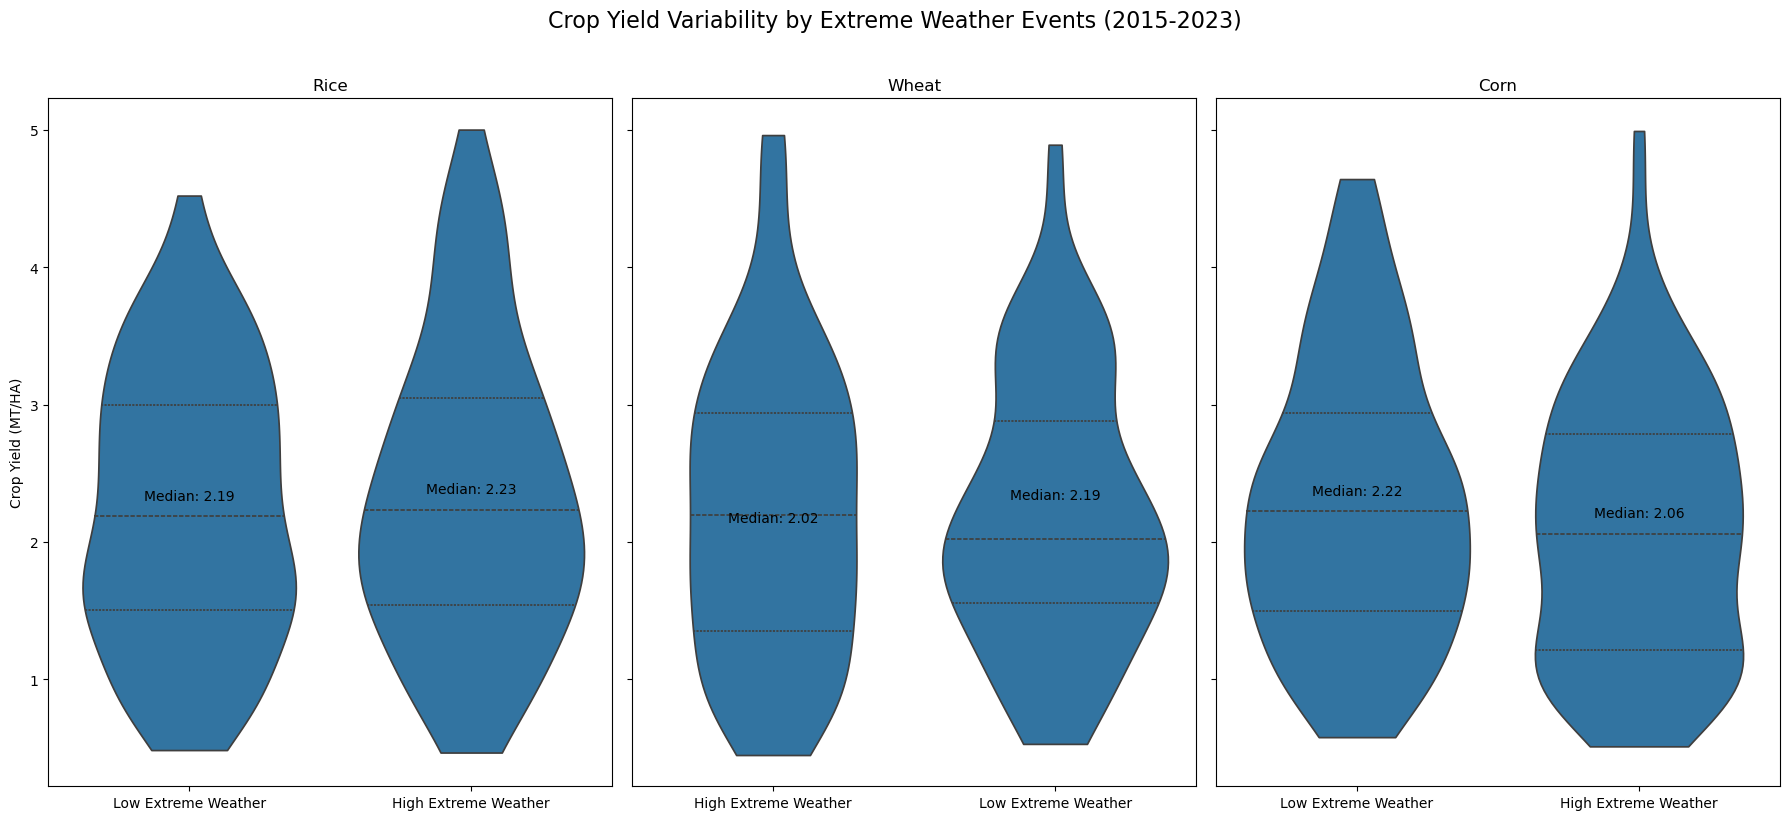

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df = pd.read_csv('climate_change_impact_on_agriculture_2024.csv')

df_recent = df[(df['Year'] >= 2015) & (df['Year'] <= 2023)].copy()
crops_of_interest = ['Rice', 'Wheat', 'Corn']
df_filtered = df_recent[df_recent['Crop_Type'].isin(crops_of_interest)].copy()

median_extreme_events = df_filtered['Extreme_Weather_Events'].median()
df_filtered['Weather_Intensity'] = np.where(
    df_filtered['Extreme_Weather_Events'] > median_extreme_events, 
    'High Extreme Weather', 
    'Low Extreme Weather'
)

fig, axes = plt.subplots(1, 3, figsize=(18, 8), sharey=True)
fig.suptitle('Crop Yield Variability by Extreme Weather Events (2015-2023)', fontsize=16, y=1.02)

for i, crop in enumerate(crops_of_interest):
    crop_data = df_filtered[df_filtered['Crop_Type'] == crop]
    
    sns.violinplot(
        ax=axes[i],
        x='Weather_Intensity',
        y='Crop_Yield_MT_per_HA',
        data=crop_data,
        inner='quartile',
        cut=0)
    
    axes[i].set_title(crop)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Crop Yield (MT/HA)' if i == 0 else '')
    
    medians = crop_data.groupby('Weather_Intensity')['Crop_Yield_MT_per_HA'].median()
    for j, intensity in enumerate(['Low Extreme Weather', 'High Extreme Weather']):
        axes[i].text(
            j, medians[intensity] + 0.1, 
            f'Median: {medians[intensity]:.2f}',
            ha='center',
            va='bottom',
            fontsize=10,
            color='black')

plt.tight_layout()
plt.show()